In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Let's First Visualise the data

In [2]:
X = pd.read_csv('./Training Data/Linear_X_Train.csv')
Y = pd.read_csv('./Training Data/Linear_Y_Train.csv')

#Converting X,Y to numpy arrays
X = X.values
Y = Y.values

print(X.shape,Y.shape)

(3750, 1) (3750, 1)


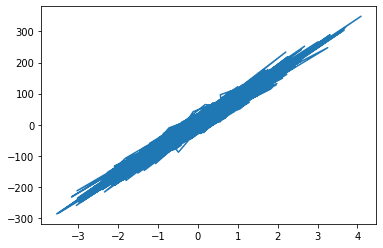

In [3]:
plt.plot(X,Y)
plt.show()

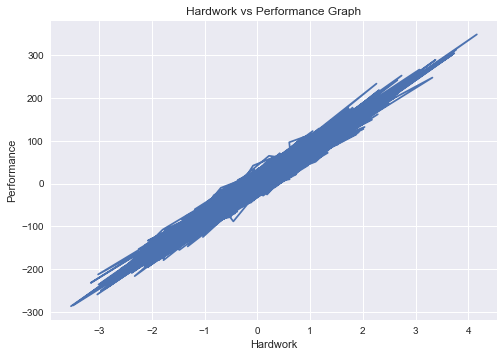

In [4]:
#Before using the data in ML, we should always bring it in standard normal form
#as then answers will be more accurate and standard
u = X.mean()
standardDeviation = X.std()
X = (X-u)/standardDeviation


plt.style.use('seaborn')
plt.plot(X,Y)
plt.title('Hardwork vs Performance Graph')
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.show() #Since the above data was almost normalized, Therefore not much 
#changes can be seen in the graph

## Linear Regression Algo

In [5]:
#This function will predict the value of the output based on the input. It is basically f(x)
def hypothesis(x,theta):
    #Here y_ mean y hat i.e predicted value of the input x
    y_ = theta[0] + x*theta[1]
    return y_

In [6]:
#This function will find the gradient (grad[0],grad[1]) i.e gradient for both the theta 1 and theta 2
def gradient(X,Y,theta):
    gradient_zero = 0
    gradient_one = 0
    for i in range(X.shape[0]):
        gradient_zero = gradient_zero + hypothesis(X[i],theta) - Y[i]
        gradient_one = gradient_one + (hypothesis(X[i],theta) - Y[i])*X[i]
        
    grad = np.array([gradient_zero,gradient_one])
    return grad/X.shape[0]   
    

In [7]:
#Here this func. will apply gradientDescent update rule on our training data to find best Theta = (Theta0,Theta1)
#which best suits are line --
def gadientDescent(X,Y,maxSteps = 1000,learning_rate = 0.1):
    
    #Step1 -  Initialising the Theta with some random values 
    theta = np.zeros((2,))
    for i in range(maxSteps):
        #This function will get us the gradient for both theta0,theta1 at the current step
        grad = gradient(X,Y,theta)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
    return theta



[ 0.68386897 79.90573694]


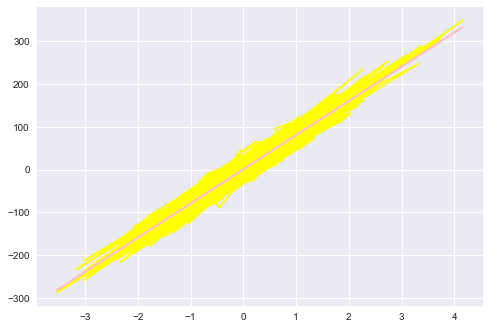

In [8]:
#First let's find the value of theta for our current data
myTheta = gadientDescent(X,Y)
print(myTheta)

#Now we have found the theta, we can predict any Y using this theta now.

#Now let's find the predicted values of y through this current line
predictedYs = hypothesis(X,myTheta) #Here also Through broadcasting, Y of all X will be predicted though
# we haven't used the for loop and we have made the function for only one query x at a time

plt.plot(X,Y,color = 'yellow')
plt.plot(X,predictedYs,color = 'pink')
plt.show()

#Clearly this line predicts the Y in best possible way. Therefore we have approximated all Y[i] by this line.

<img src= 'output.jpeg'>

In [9]:
#Note - Above algo is correct. But i am making some more changes(To show how error changes with change in theta) 
#in that algo to analyse it correctly. 

In [10]:
#After finding the value of theta = (theta0,theta1). We will be Obviously finding the abosulte squared error(or J(theta))
def findingMeanSquaredError(X,Y,theta):
    total_error = 0
    size = X.shape[0]
    for i in range(size):
        total_error = total_error + (hypothesis(X[i],theta) - Y[i])**2
        
    return total_error/size  

In [11]:
def gradientDescent2(X,Y,maxSteps = 1000,learning_rate = 0.1):
    
    
    error_list = []
    theta_list = []
    theta = np.zeros((2,))
    
    
    for i in range(maxSteps):
        current_error = findingMeanSquaredError(X,Y,theta)
        error_list.append(current_error)
        print(theta,end =' ')
        
        
        grad = gradient(X,Y,theta)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        theta_list.append((theta[0],theta[1]))
        
    return (theta,error_list,theta_list)

In [56]:
l = gradientDescent2(X,Y)

[0. 0.] [0.0683869  7.99057369] [ 0.1299351  15.18209002] [ 0.18532849 21.65445471] [ 0.23518254 27.47958293] [ 0.28005118 32.72219834] [ 0.32043296 37.4405522 ] [ 0.35677656 41.68707067] [ 0.3894858 45.5089373] [ 0.41892412 48.94861726] [ 0.4454186  52.04432923] [ 0.46926364 54.83047   ] [ 0.49072417 57.3379967 ] [ 0.51003865 59.59477072] [ 0.52742168 61.62586734] [ 0.54306641 63.4538543 ] [ 0.55714667 65.09904257] [ 0.5698189 66.579712 ] [ 0.5812239 67.9123145] [ 0.59148841 69.11165674] [ 0.60072647 70.19106476] [ 0.60904072 71.16253198] [ 0.61652354 72.03685248] [ 0.62325808 72.82374092] [ 0.62931917 73.53194053] [ 0.63477415 74.16932017] [ 0.63968363 74.74296184] [ 0.64410217 75.25923935] [ 0.64807885 75.72388911] [ 0.65165786 76.1420739 ] [ 0.65487897 76.5184402 ] [ 0.65777797 76.85716987] [ 0.66038707 77.16202658] [ 0.66273526 77.43639762] [ 0.66484863 77.68333155] [ 0.66675066 77.90557209] [ 0.66846249 78.10558857] [ 0.67000314 78.28560341] [ 0.67138972 78.44761676] [ 0.67263765

[ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897

[ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897

[ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897

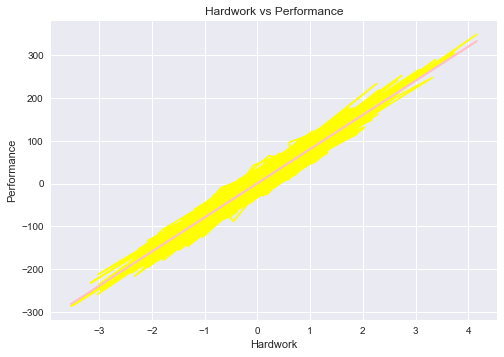

In [57]:
myTheta,error_list,theta_list = l
predictedYs = hypothesis(X,myTheta)
plt.plot(X,Y,color = 'yellow')
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.title('Hardwork vs Performance')
plt.plot(X,predictedYs,color = 'pink')
plt.show()

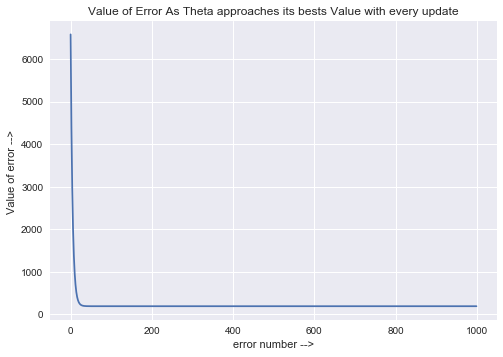

In [58]:
#We can clearly see as we were moving towards the minima, error was continuously reducing
plt.plot(error_list)
plt.title('Value of Error As Theta approaches its bests Value with every update')
plt.ylabel('Value of error --> ')
plt.xlabel('error number -->')
plt.show()

In [59]:
#Now let's predict the results of test data
X_test = pd.read_csv('./Test Cases/Linear_X_Test.csv').values
y_test = hypothesis(X_test,myTheta)
print(y_test.shape)

#Now first convert the numpy array into a DataFrame Object
myDataFrame = pd.DataFrame(y_test,columns = ['y'])

myDataFrame.head()

(1250, 1)


,y
0,-149.374663
1,-68.756767
2,-201.492222
3,221.240119
4,47.908170


In [60]:
#Now let's write it directly into a csv file
myDataFrame.to_csv('challenge_answer.csv',index = False)

### Computing Score

In [61]:
def r2_score(Y,Y_):
    #Instead of using for loop to find sum , np.sum is recommended as it is faster as it finds the sum on multiple threads
    numerator = np.sum((Y-Y_)**2)
    denominator = np.sum((Y-Y.mean())**2)
    score = 1- (numerator/denominator)
    return score*100    

In [62]:
myAcurracy = r2_score(Y,predictedYs)

In [63]:
print(myAcurracy)

97.09612233822354


### Visualising Loss Function with Theta Updates( Gradient Descent Trajectory )

In [64]:
from mpl_toolkits.mplot3d import Axes3D

In [65]:
myTheta

array([ 0.68386897, 79.90573694])

In [66]:
print(type(error_list))

error_list = np.asarray(error_list)

print(error_list.shape)

<class 'list'>
(1000, 1)


In [67]:

print(type(theta_list))

theta_list = np.asarray(theta_list)

print(theta_list.shape)

<class 'list'>
(1000, 2)


In [69]:
theta_list[:,0].shape , theta_list[:,1].shape  , error_list[:,0].shape

((1000,), (1000,), (1000,))

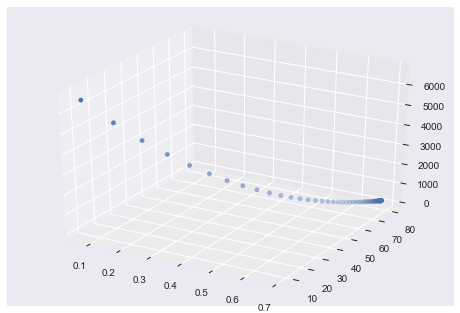

In [74]:
##Now first go through 3D visulisation code, then you will understand this better --
figure = plt.figure()
axes = figure.gca(projection='3d')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list,cmap='coolwarm')
plt.show()

In [97]:
"""
Clearly are not able to plot exact curve, what J(theta) represents, for this we need to plot this J(theta) for some
more random values of theta, let's first some more value of random values of theta and find their error too
"""

"""
Reason i am generating values in above region and why not in other regions . It is because as i observed in my 1000
steps my TO changed from 0 to 0.642..  and T1 changed from 0 to 79.... Therefore i wanted to generate other theta too
around that only. So that we can do it.
"""
TO = np.arange(-40,40,1)  
T1 = np.arange(40,120,1)  


TO,T1 = np.meshgrid(TO,T1)# Now we will consider Consider TO value as theta0 and T1 values as theta1

print( TO.shape , T1.shape )

print(Y.shape)


"""
X is XTrain and Y is also YTrain(actual output). Now we have to find the Mean Squared Error When 
theta1 = T1[i,j] and theta0 = T0[i,j]. Therefore when theta = ( T0[i,j] , T1[i,j] ). Therefore predicted Y for
this theta for the training data will be
"""

J = np.zeros(TO.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + TO[i,j]  #Predicted Y for this particular theta, therefore let's calculate MSE for this theta
        J[i,j] = np.sum((Y-y_)**2)
        J[i,j] = J[i,j]/predictedYs.shape[0]  
        
print(J.shape)    

(80, 80) (80, 80)
(3750, 1)
(80, 80)


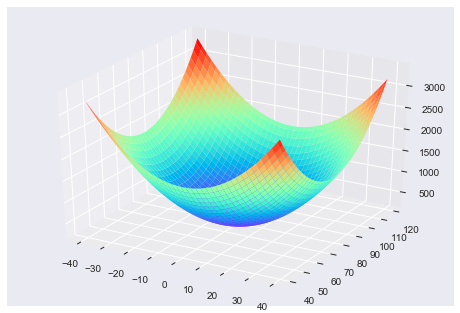

In [98]:
#Now first let's plot this curve . Visualizing this loss function J(theta)
plt.style.use('seaborn')
figure = plt.figure()
axes = figure.gca(projection='3d')
axes.plot_surface(TO,T1,J,cmap='rainbow')
plt.show()

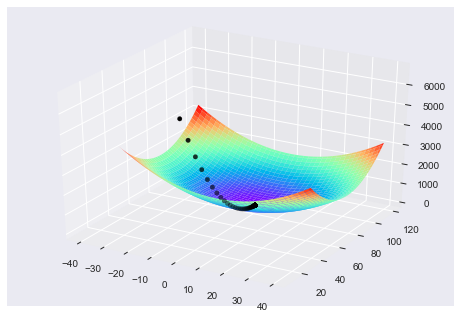

In [101]:
"""
Therefore Now we have plotted J(theta) for many values of theta. Therefore now we are able to get how exactly J(theta)
would look like in 3D. Therefore now let's see, how does the error will keep on reducing with every update when 
we applied gradient descent on that. Clearly it will start from top and move to bottom i.e minima of J(theta).
Therefore
"""
plt.style.use('seaborn')
figure = plt.figure()
axes = figure.gca(projection='3d')
axes.plot_surface(TO,T1,J,cmap='rainbow')

#Now let's also plot our Theta Changes , which occured during updation in the gradient descent rule.
axes.scatter(theta_list[:,0],theta_list[:,1],error_list,color = 'black')

plt.show()

#Therefore clearly 

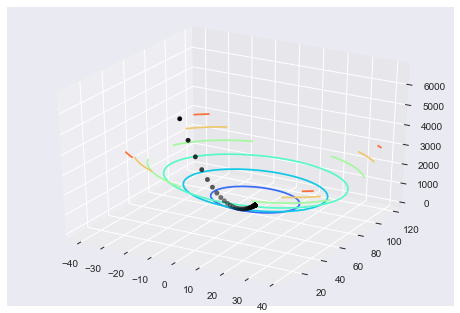

In [103]:
# Contour Plot of above J(theta)
figure = plt.figure()
axes = figure.gca(projection='3d')
axes.contour(TO,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list,color = 'black')
plt.show()

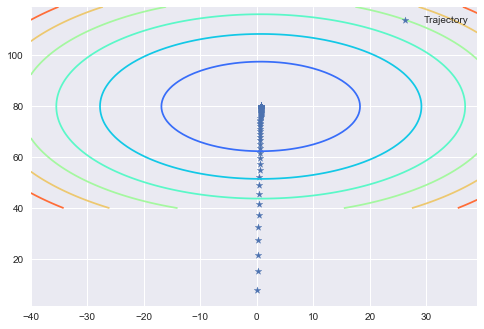

In [105]:
"""
If we will observe what this in a python scrip where we will be able to rotate it too, then we will get a better 
visualisation of the above plot
"""

#2-D Contour Plot of above J(theta)
plt.contour(TO,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1],marker='*',label='Trajectory')
plt.legend()
plt.show()


In [106]:
#Now let's save this theta-error List in a file, so that we can later visualise it. And
#we are not required to find it again and again.

np.save('./FinalData/ThetaList.npy',theta_list)
np.save('./FinalData/myTheta.npy',myTheta)

### Plot how change takes place with every updation in  in theta0 vs theta1

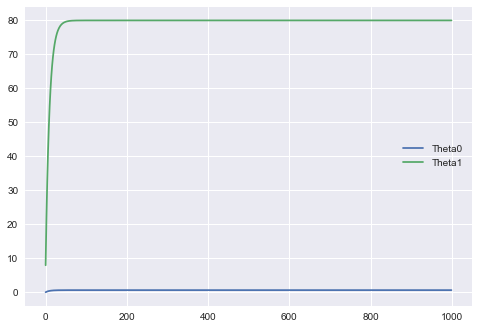

In [107]:
plt.plot(theta_list[:,0],label="Theta0")
plt.plot(theta_list[:,1],label="Theta1")
plt.legend()
plt.show()

#Therefore clearly change in theta1 in 1000 steps is very less , but change in theta0 is very large